# Generating & Analyzing White Noise Model
## A White Noise model is a purely random process where values fluctuate around a constant mean with no correlation over time.

### Task: Generate and Analyze White Noise

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

## Explanation: These libraries help in handling time series data, visualization, and statistical modeling.

## Generate a White Noise Time Series

In [2]:
np.random.seed(12)
dates = pd.date_range("2018-08-01", "2018-10-31", freq="B", inclusive="left")
commute = np.random.normal(25, 4, len(dates))
commute_series = pd.Series(commute, index=dates)

### Explanation: Generates normally distributed random numbers (mean = 25, std = 4). Creates a DatetimeIndex for time-based indexing.

### Visualize the Time Series

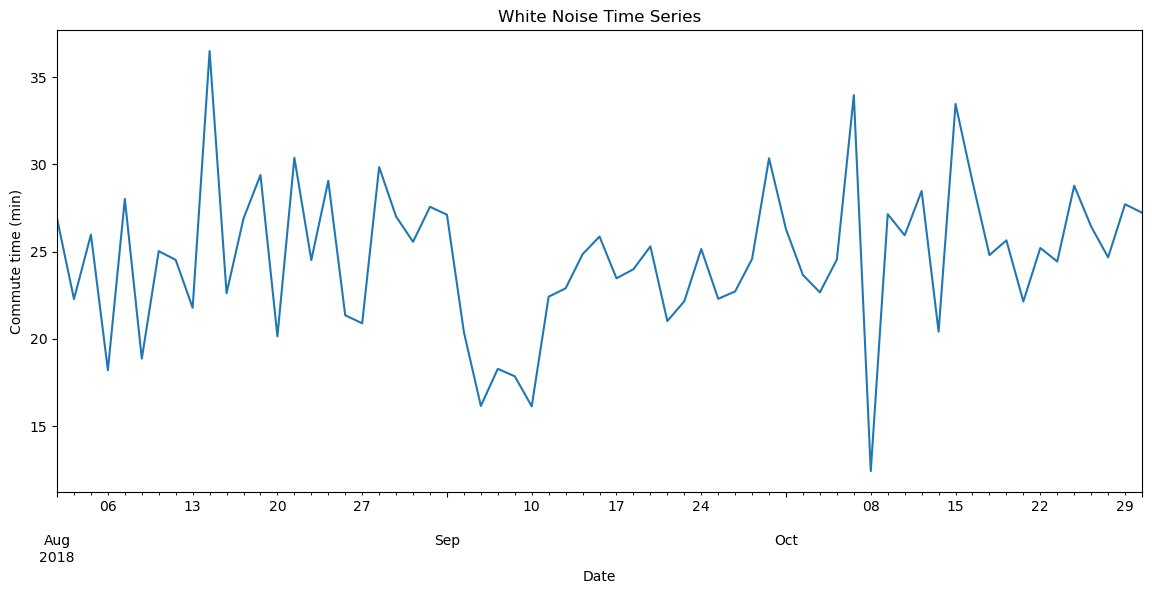

In [3]:
commute_series.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Commute time (min)")
plt.title("White Noise Time Series")
plt.show()

### Explanation: This plot shows random fluctuations over time, characteristic of white noise.

### Analyze Statistical Properties

In [4]:
print("Mean:", np.mean(commute_series))
print("Standard Deviation:", np.std(commute_series))

Mean: 24.629331839058004
Standard Deviation: 4.2480368492867395


# Generating and analyzing Random Walk

### A Random Walk model is a time series where each value depends on the previous one plus a random component.

In [5]:
np.random.seed(11)
dates = pd.date_range("2010-01-01", "2010-11-30", freq="B", inclusive="left")
error = np.random.normal(0, 10, len(dates))

def random_walk(start, error):
    Y_0 = start
    return np.cumsum(error) + Y_0

shares_value = random_walk(1000, error)
shares_series = pd.Series(shares_value, index=dates)

## Explanation: Generates random errors (ε_t). Uses cumulative sum to create a dependent series.

### Visualize the Random Walk

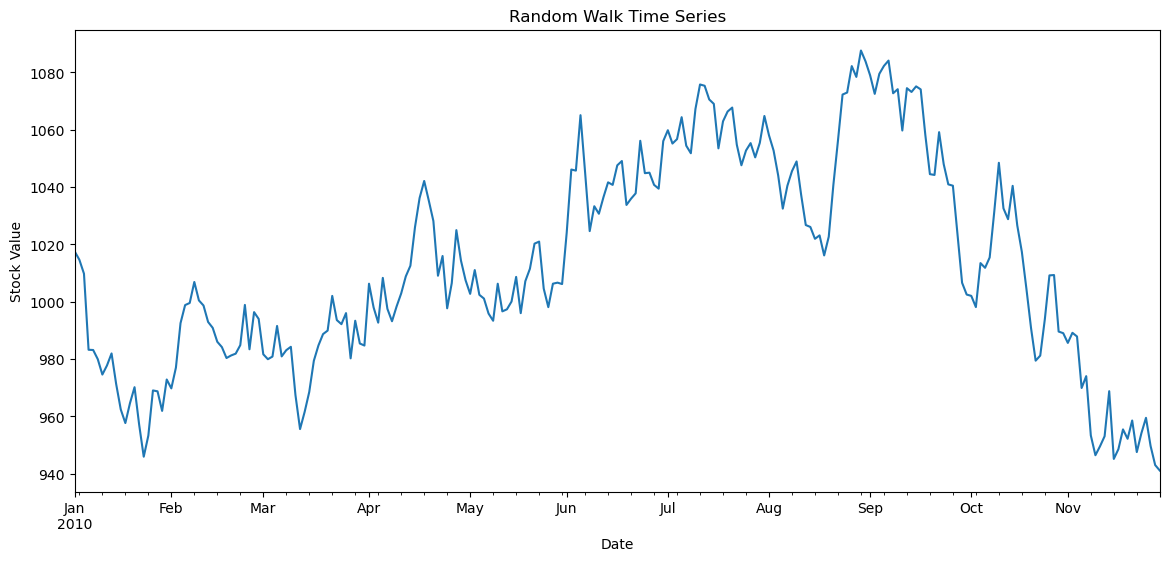

In [6]:
shares_series.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.title("Random Walk Time Series")
plt.show()

## Observation: The series drifts over time instead of fluctuating around a mean, unlike white noise.

## Convert Random Walk to White Noise Using Differencing

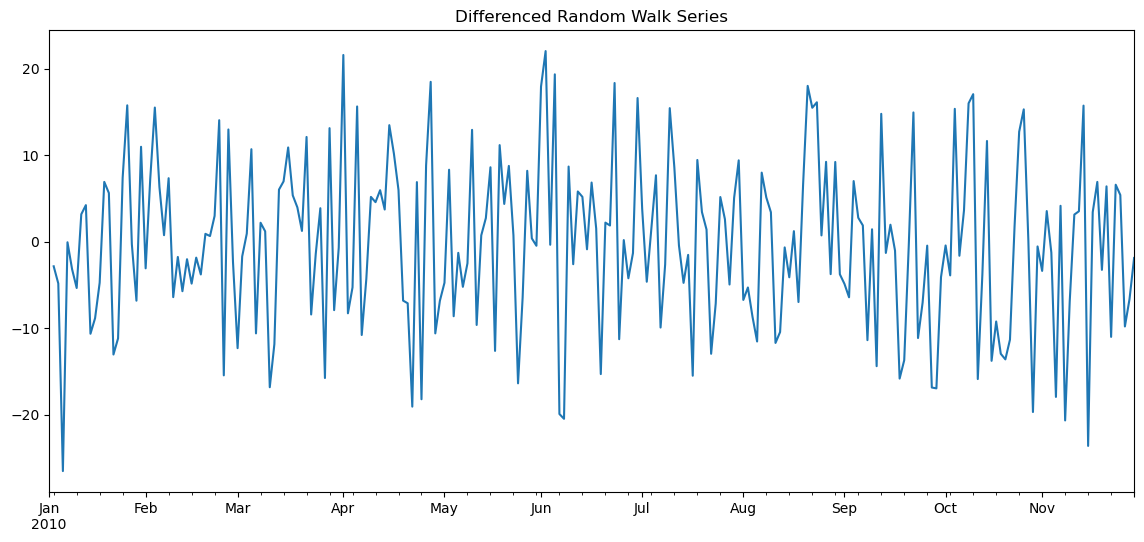

In [7]:
shares_diff = shares_series.diff(periods=1)
shares_diff.plot(figsize=(14, 6))
plt.title("Differenced Random Walk Series")
plt.show()

### Explanation: First-order differencing removes the trend, converting the data into a stationary series.

# Understanding Correlation and Auto correlation

## Time series often exhibit autocorrelation, meaning past values influence future values.

### Load Macroeconomic Time Series Data

In [8]:
data = sm.datasets.macrodata.load_pandas().data

# Convert 'year' and 'quarter' into a datetime format
data["year_quarter"] = pd.to_datetime(data["year"].astype(int).astype(str) + "Q" + data["quarter"].astype(int).astype(str))
data.set_index("year_quarter", inplace=True)

/tmp/ipykernel_39500/887323358.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["year_quarter"] = pd.to_datetime(data["year"].astype(int).astype(str) + "Q" + data["quarter"].astype(int).astype(str))


### Explanation: The dataset contains economic indicators (e.g., GDP, inflation, unemployment).

### Select and Plot a Time Series Variable (Real GDP)

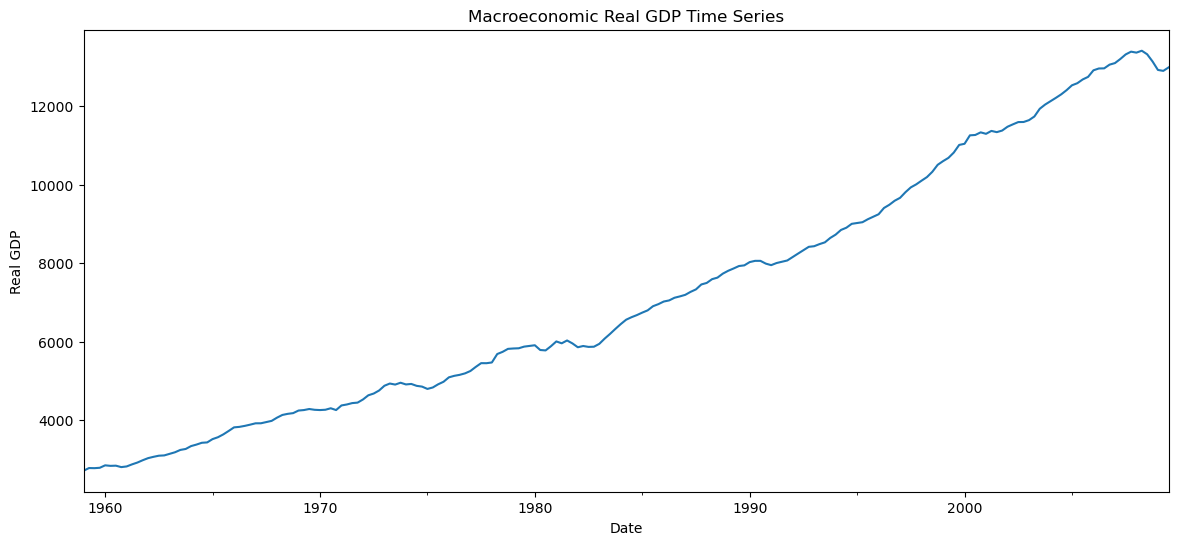

In [9]:
gdp_series = data["realgdp"]
gdp_series.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Real GDP")
plt.title("Macroeconomic Real GDP Time Series")
plt.show()

## Observation: GDP usually follows a long-term trend, indicating non-stationarity.

### Compute Correlation Matrix

In [10]:
print(data[["realgdp", "infl", "unemp"]].corr())

          realgdp      infl     unemp
realgdp  1.000000 -0.191880 -0.064297
infl    -0.191880  1.000000  0.065015
unemp   -0.064297  0.065015  1.000000


### Explanation: Identifies relationships between GDP, inflation, and unemployment.

### Apply Differencing to Remove Trends in GDP

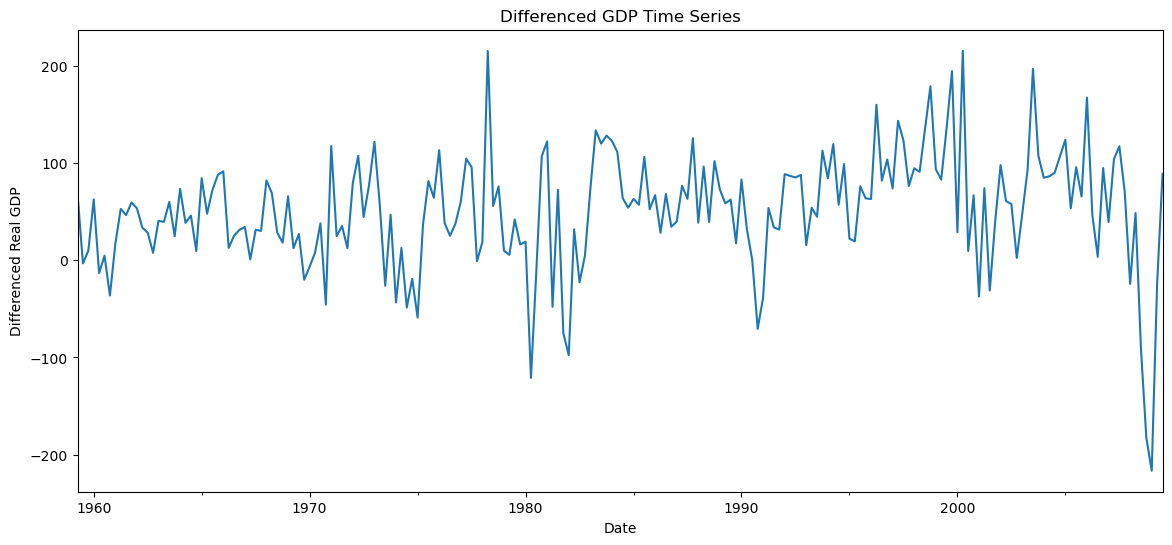

In [11]:
gdp_diff = gdp_series.diff(periods=1).dropna()
gdp_diff.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Differenced Real GDP")
plt.title("Differenced GDP Time Series")
plt.show()

## Observation: Differencing removes trends, making the series stationary.

# Plot the Autocorrelation Function (ACF)

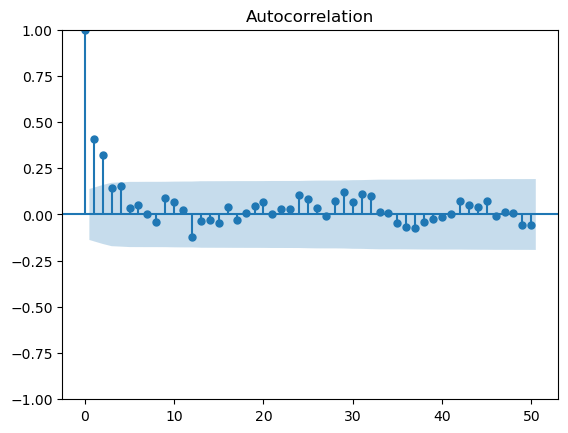

In [12]:
plot_acf(gdp_diff, lags=50)
plt.show()

# Plot the Partial Autocorrelation Function (PACF)

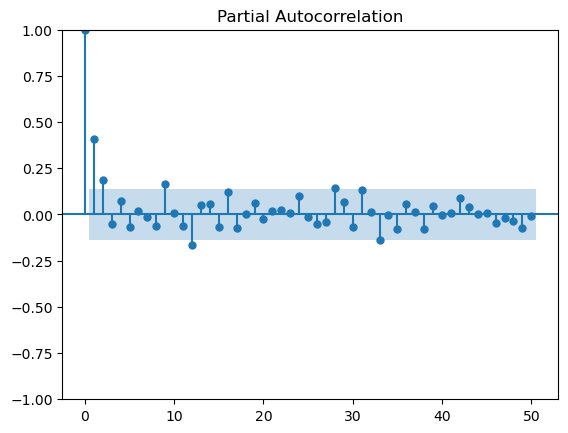

In [13]:
plot_pacf(gdp_diff, lags=50)
plt.show()

## Explanation: ACF shows the strength of correlation at different lags. PACF helps determine the order of autoregression (AR) models.

# Applying AR, MA, and ARMA Models

## After identifying autocorrelation patterns, we apply AutoRegressive (AR), Moving Average (MA), and ARMA models.

## Fit an AR(1) Model

In [14]:
model_ar = ARIMA(gdp_diff, order=(1, 0, 0))
results_ar = model_ar.fit()
print(results_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  202
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1094.605
Date:                Wed, 10 Sep 2025   AIC                           2195.209
Time:                        02:55:11   BIC                           2205.134
Sample:                    04-01-1959   HQIC                          2199.225
                         - 07-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9287      6.654      7.654      0.000      37.887      63.971
ar.L1          0.4100      0.050      8.253      0.000       0.313       0.507
sigma2      2976.7607    242.486     12.276      0.0

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


## Explanation: AR(1) model uses past values to predict future ones.

## Fit an MA(1) Model

In [15]:
model_ma = ARIMA(gdp_diff, order=(0, 0, 1))
results_ma = model_ma.fit()
print(results_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  202
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1100.979
Date:                Wed, 10 Sep 2025   AIC                           2207.957
Time:                        02:56:04   BIC                           2217.882
Sample:                    04-01-1959   HQIC                          2211.973
                         - 07-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9222      5.234      9.730      0.000      40.665      61.180
ma.L1          0.2818      0.052      5.372      0.000       0.179       0.385
sigma2      3173.1088    243.224     13.046      0.0

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


## Explanation: MA(1) model uses past error terms for prediction.

## Fit an ARMA(2,1) Model

In [16]:
model_arma = ARIMA(gdp_diff, order=(2, 0, 1))
results_arma = model_arma.fit()
print(results_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  202
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1090.291
Date:                Wed, 10 Sep 2025   AIC                           2190.582
Time:                        02:56:43   BIC                           2207.124
Sample:                    04-01-1959   HQIC                          2197.275
                         - 07-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9291      7.648      6.659      0.000      35.940      65.918
ar.L1         -0.1462      0.262     -0.559      0.576      -0.659       0.367
ar.L2          0.3752      0.098      3.847      0.0

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


## Explanation: ARMA(2,1) combines AR and MA components.

# Compare Models Using AIC/BIC

In [17]:
print("AIC:", results_arma.aic, "BIC:", results_arma.bic)

AIC: 2190.582489647136 BIC: 2207.123828134142


### Explanation: Lower AIC/BIC values indicate a better model fit.

# Common Challenges and Solutions

 ### White Noise vs. Random Walk – Identifying True Trends

Challenge:
Differentiating between purely random fluctuations (White Noise) and actual trends (Random Walk) can be misleading.
A time series may appear to have a pattern, but this could be a result of randomness rather than meaningful trends.
Solution:
Statistical tests, such as the Augmented Dickey-Fuller (ADF) test, can help determine whether a series is stationary or not.
Applying differencing techniques can help stabilize a time series, making it easier to analyze.
Handling Non-Stationarity – To Difference or Not?

Challenge:
Many economic time series, such as GDP, exhibit trends that make them non-stationary.
Non-stationarity violates the assumptions of many forecasting models (e.g., ARIMA).
Solution:
Use differencing (first-order or higher) to remove trends.
Check stationarity using rolling mean plots, ACF/PACF plots, and the ADF test.
Selecting the Right Forecasting Model (AR, MA, ARMA)

Challenge:
Different time series datasets may require different forecasting models, and selecting the appropriate model can be difficult.
Relying only on visual inspection of ACF and PACF plots may lead to suboptimal model selection.
Solution:
Compare AutoRegressive (AR), Moving Average (MA), and ARMA models using statistical evaluation metrics.
Use AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) to determine the best model.
If necessary, experiment with ARIMA (which includes differencing) for non-stationary series.
Evaluating Model Performance – Beyond AIC/BIC

Challenge:
AIC/BIC values help compare models, but they don’t always indicate how well a model forecasts future values.
Overfitting can lead to models that fit historical data well but perform poorly on new data.
Solution:
Evaluate models using out-of-sample testing (train-test split).
Use metrics like Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and Mean Absolute Percentage Error (MAPE) to measure prediction accuracy.
If necessary, experiment with Exponential Smoothing or ARIMA models for more refined predictions.